In [114]:
#ImportingLibraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as pt
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [115]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
!ls /content/drive/MyDrive/datasets/sales.csv

/content/drive/MyDrive/datasets/sales.csv


In [117]:
!ls /content/drive/MyDrive/datasets/features.csv

/content/drive/MyDrive/datasets/features.csv


In [118]:
!ls /content/drive/MyDrive/datasets/stores.csv

/content/drive/MyDrive/datasets/stores.csv


In [119]:
stores_df = pd.read_csv('/content/drive/MyDrive/datasets/stores.csv')
sales_df = pd.read_csv('/content/drive/MyDrive/datasets/sales.csv')
features_df = pd.read_csv('/content/drive/MyDrive/datasets/features.csv')

In [120]:
# Display initial data summaries
print("Stores Dataset:")
print(stores_df.info())
print(stores_df.head())

Stores Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Outlet_ID      45 non-null     int64  
 1   Category       45 non-null     object 
 2   Square_Meters  45 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 1.2+ KB
None
   Outlet_ID  Category  Square_Meters
0       1001   Premium        14058.0
1       1002   Premium        18795.0
2       1003  Standard         3474.0
3       1004   Premium        19125.0
4       1005  Standard         3240.0


In [121]:
print("Features Dataset:")
print(features_df.info())
print(features_df.head())

Features Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Outlet_ID           8190 non-null   int64  
 1   Week_Period         8190 non-null   object 
 2   Avg_Temp            8190 non-null   float64
 3   Gas_Cost_per_Liter  8190 non-null   float64
 4   Promo1_Percent      8190 non-null   float64
 5   Promo2_Percent      8190 non-null   float64
 6   Promo3_Percent      8190 non-null   float64
 7   Promo4_Percent      8190 non-null   float64
 8   Promo5_Percent      8190 non-null   float64
 9   Price_Index         7605 non-null   float64
 10  Jobless_Rate        7605 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 704.0+ KB
None
   Outlet_ID Week_Period  Avg_Temp  Gas_Cost_per_Liter  Promo1_Percent  \
0       1001    2/5/2015       5.7                0.68             0.0   
1       1001   2/12/2

In [122]:
print("Sales Dataset:")
print(sales_df.info())
print(sales_df.head())

Sales Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Outlet_ID         421570 non-null  int64  
 1   Section_ID        421570 non-null  int64  
 2   Week_Period       421570 non-null  object 
 3   Period_Revenue_K  421570 non-null  float64
 4   Special_Week      421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB
None
   Outlet_ID  Section_ID Week_Period  Period_Revenue_K  Special_Week
0       1001          10  2015-02-05             28.66         False
1       1001          10  2015-02-12             52.95          True
2       1001          10  2015-02-19             47.83         False
3       1001          10  2015-02-26             22.31         False
4       1001          10  2015-03-05             25.10         False


**Analysing DataSets**


In [123]:
stores_df.shape

(45, 3)

In [124]:
features_df.shape

(8190, 11)

In [125]:
sales_df.shape

(421570, 5)

In [126]:
# Check for missing values in stores dataset
stores_df.isnull().sum()

,0
Outlet_ID,0
Category,0
Square_Meters,0


In [127]:
# Ensure Outlet_ID is unique
if stores_df['Outlet_ID'].is_unique:
    print("All Outlet_IDs are unique.")
else:
    print("Duplicate Outlet_IDs found.")

All Outlet_IDs are unique.


In [128]:
# Inspect Square_Meters for inconsistencies
print("Summary Statistics for Square_Meters:")
print(stores_df['Square_Meters'].describe())

Summary Statistics for Square_Meters:
count       45.000000
mean     12104.044444
std       5929.522900
min       3240.000000
25%       6569.000000
50%      11753.000000
75%      18795.000000
max      20404.000000
Name: Square_Meters, dtype: float64


In [129]:
# Check for missing values in features dataset
features_df.isnull().sum()

,0
Outlet_ID,0
Week_Period,0
Avg_Temp,0
Gas_Cost_per_Liter,0
Promo1_Percent,0
Promo2_Percent,0
Promo3_Percent,0
Promo4_Percent,0
Promo5_Percent,0
Price_Index,585


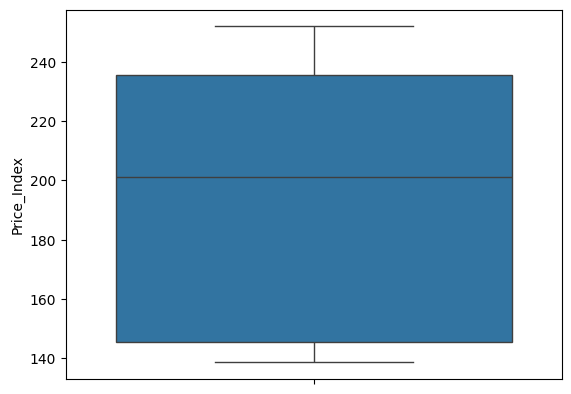

In [130]:
# Imputing missing values in 'Price_Index' and 'Jobless_Rate'
sns.boxplot(features_df['Price_Index'])
features_df['Price_Index'].fillna(features_df['Price_Index'].mean(), inplace=True)

<Axes: ylabel='Jobless_Rate'>

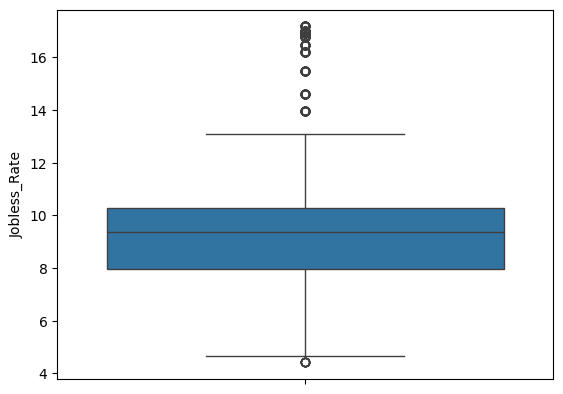

In [131]:
import seaborn as sns
sns.boxplot(features_df['Jobless_Rate'])

In [132]:
features_df['Jobless_Rate'].fillna(features_df['Jobless_Rate'].median(), inplace=True)

In [133]:
# Verifying that there are no missing values remaining
print("Missing Values After Imputation:")
print(features_df.isnull().sum().sum())

Missing Values After Imputation:
0


In [134]:
# Converting Week_Period to datetime format
features_df['Week_Period'] = pd.to_datetime(features_df['Week_Period'])

In [135]:
# Ensure Week_Period values are valid
features_df['Week_Period'] = pd.to_datetime(features_df['Week_Period'])
invalid_dates = features_df[features_df['Week_Period'].isna()]
print(f"Number of invalid dates: {len(invalid_dates)}")

Number of invalid dates: 0


In [136]:
promo_cols = ['Promo1_Percent', 'Promo2_Percent', 'Promo3_Percent', 'Promo4_Percent', 'Promo5_Percent']

In [137]:
# Replacing negative values in promotion columns with 0
features_df[promo_cols] = features_df[promo_cols].clip(lower=0)

In [138]:
features_df.describe()

,Outlet_ID,Week_Period,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate
count,8190.000000,8190,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8190.000000,8.190000e+03,8190.000000,8190.000000
mean,1023.000000,2016-10-30 18:51:25.714285824,15.197766,0.899659,5193.893293,1810.588558,1164.770272,2089.144667,3.065146e+03,189.706970,9.390630
min,1001.000000,2015-02-05 00:00:00,-21.800000,0.650000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,138.670000,4.420000
25%,1012.000000,2015-12-17 00:00:00,7.700000,0.800000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,145.920000,8.200000
50%,1023.000000,2016-10-31 12:00:00,16.000000,0.930000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,189.706970,9.370000
75%,1034.000000,2017-09-14 00:00:00,23.300000,0.990000,6959.375000,147.885000,36.330000,1162.037500,4.020438e+03,234.045000,10.227500
max,1045.000000,2018-07-26 00:00:00,38.900000,1.180000,154777.470000,156779.310000,224224.960000,101212.280000,1.157172e+06,251.870000,17.180000
std,12.987966,NaN,10.377532,0.113984,11082.912368,8243.306702,11309.922398,7060.667235,1.414683e+04,42.121945,2.170938


**Anamolies that can impact business decisions**

1.Average Temperature has minimum value of -21.8 degrees but the temperature value is subject to location. Hence, we are not treating this as inconsistency

2.Promo Percentage Columns also has anamoly as the maximum percentage is above 100%, likely due to data entry errors.

3.Negative Revenue Values which may be due to data entry errors.

4.Missing data in Price Index and Jobless Rate columns, which were treated by imputing with mean and median.

In [139]:
sales_df.describe()

,Outlet_ID,Section_ID,Period_Revenue_K
count,421570.000000,421570.000000,421570.000000
mean,1022.200546,442.603174,18.378428
std,12.785297,304.920540,26.117873
min,1001.000000,10.000000,-5.740000
25%,1011.000000,180.000000,2.390000
50%,1022.000000,370.000000,8.750000
75%,1033.000000,740.000000,23.240000
max,1045.000000,990.000000,797.060000


In [140]:
sales_df.isnull().sum()

,0
Outlet_ID,0
Section_ID,0
Week_Period,0
Period_Revenue_K,0
Special_Week,0


In [141]:
# Merging Data
#Step 1 Standardize date formats in sales and features datasets
sales_df['Week_Period'] = pd.to_datetime(sales_df['Week_Period'],format='%Y-%m-%d')

features_df['Week_Period'] = pd.to_datetime(features_df['Week_Period'],format='%Y-%m-%d')

In [142]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Outlet_ID         421570 non-null  int64         
 1   Section_ID        421570 non-null  int64         
 2   Week_Period       421570 non-null  datetime64[ns]
 3   Period_Revenue_K  421570 non-null  float64       
 4   Special_Week      421570 non-null  bool          
dtypes: bool(1), datetime64[ns](1), float64(1), int64(2)
memory usage: 13.3 MB


In [143]:
# Step 2: Merging store with feature dataset on 'Outlet_ID'
stores_features_df = stores_df.merge(features_df, on='Outlet_ID', how='inner')


In [144]:
# Step 3: Merging the result with features dataset on 'Outlet_ID' and 'Week_Period'
final_df = stores_features_df.merge(sales_df, on=['Outlet_ID', 'Week_Period'], how='inner')


In [145]:
# Step 4: Display the final merged dataset
print("Final Merged Dataset Shape:", final_df.shape)
print("Column Names in Final Dataset:", final_df.columns)
print(final_df.head())


Final Merged Dataset Shape: (421570, 16)
Column Names in Final Dataset: Index(['Outlet_ID', 'Category', 'Square_Meters', 'Week_Period', 'Avg_Temp',
       'Gas_Cost_per_Liter', 'Promo1_Percent', 'Promo2_Percent',
       'Promo3_Percent', 'Promo4_Percent', 'Promo5_Percent', 'Price_Index',
       'Jobless_Rate', 'Section_ID', 'Period_Revenue_K', 'Special_Week'],
      dtype='object')
   Outlet_ID Category  Square_Meters Week_Period  Avg_Temp  \
0       1001  Premium        14058.0  2015-02-05       5.7   
1       1001  Premium        14058.0  2015-02-05       5.7   
2       1001  Premium        14058.0  2015-02-05       5.7   
3       1001  Premium        14058.0  2015-02-05       5.7   
4       1001  Premium        14058.0  2015-02-05       5.7   

   Gas_Cost_per_Liter  Promo1_Percent  Promo2_Percent  Promo3_Percent  \
0                0.68             0.0             0.0             0.0   
1                0.68             0.0             0.0             0.0   
2                0.68  

In [146]:
# Summary statistics
print("\nSummary Statistics:\n")
final_df.describe()


Summary Statistics:



,Outlet_ID,Square_Meters,Week_Period,Avg_Temp,Gas_Cost_per_Liter,Promo1_Percent,Promo2_Percent,Promo3_Percent,Promo4_Percent,Promo5_Percent,Price_Index,Jobless_Rate,Section_ID,Period_Revenue_K
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,1022.200546,12702.363245,2016-06-17 17:15:55.656237312,15.605277,0.887789,3885.112198,1320.105382,702.139351,1624.698439,2494.158559,188.322189,9.552442,442.603174,18.378428
min,1001.000000,3240.000000,2015-02-05 00:00:00,-18.900000,0.650000,0.000000,0.000000,0.000000,0.000000,0.000000,138.670000,4.650000,10.000000,-5.740000
25%,1011.000000,8699.000000,2015-10-08 00:00:00,8.200000,0.770000,0.000000,0.000000,0.000000,0.000000,0.000000,145.220000,8.270000,180.000000,2.390000
50%,1022.000000,13022.000000,2016-06-17 00:00:00,16.700000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,200.550000,9.440000,370.000000,8.750000
75%,1033.000000,18813.000000,2017-02-24 00:00:00,23.500000,0.990000,4213.580000,3.300000,6.810000,637.940000,3252.060000,233.660000,10.290000,740.000000,23.240000
max,1045.000000,20404.000000,2017-10-26 00:00:00,37.900000,1.180000,132970.140000,156779.310000,212445.910000,101212.280000,162778.920000,249.960000,17.180000,990.000000,797.060000
std,12.785297,5665.249574,NaN,10.249250,0.121214,9078.578879,7626.780548,8293.309428,5841.794931,6311.443910,43.075209,2.236139,304.920540,26.117873


In [147]:
final_df.shape

(421570, 16)

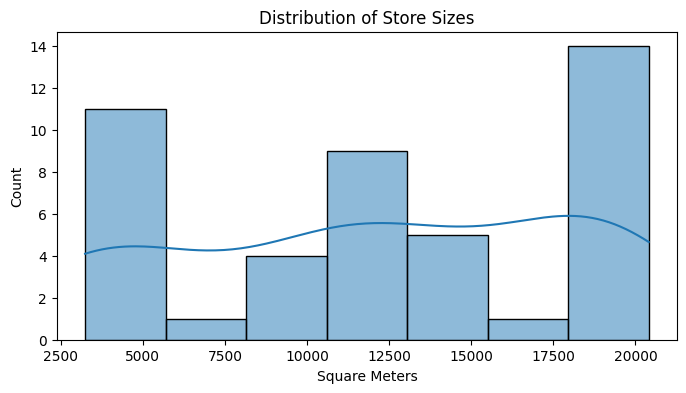

In [148]:
# Distribution of store sizes
plt.figure(figsize=(8, 4))
sns.histplot(stores_df['Square_Meters'], kde=True)
plt.title('Distribution of Store Sizes')
plt.xlabel('Square Meters')
plt.ylabel('Count')
plt.show()

Larger stores (17,500–20,000 square meters) dominate in number, followed by smaller stores (~5,000 square meters), indicating a bimodal distribution of store sizes.

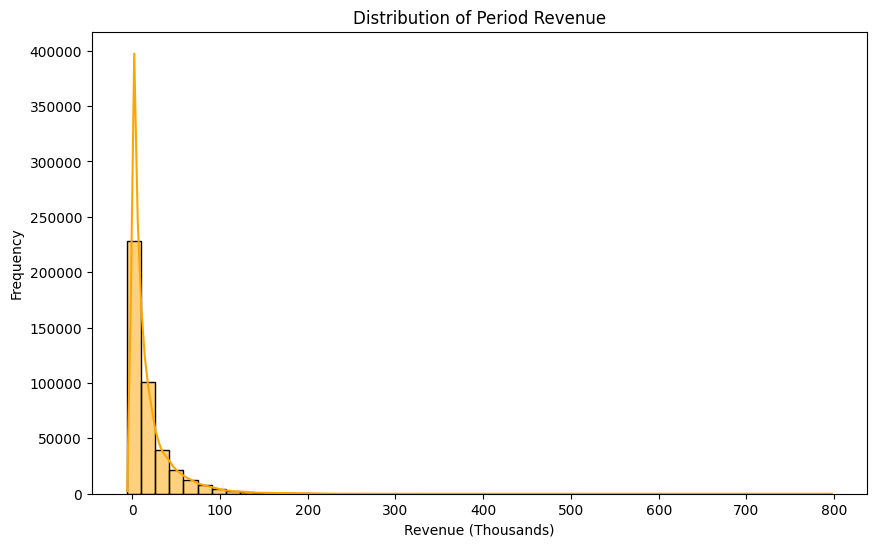

In [149]:
# Distribution of Period Revenue (Sales)
plt.figure(figsize=(10, 6))
sns.histplot(final_df['Period_Revenue_K'], bins=50, kde=True, color='orange')
plt.title('Distribution of Period Revenue')
plt.xlabel('Revenue (Thousands)')
plt.ylabel('Frequency')
plt.show()

In [150]:
#Insights from above visualisation
#The distribution of revenue is highly right-skewed.
#Most weeks generate low revenue (below 50K).
#There is a long tail representing weeks with exceptionally high revenue (>200K).
#Focus on identifying drivers for both low-revenue and high-revenue weeks.

#Comments on Insights:
#The majority of revenue data points lie in the lower range (0-50K).
#High-revenue weeks likely correspond to special events, promotions, or specific sections.
#Outliers (weeks with >200K revenue) need further exploration to identify success factors.
#Opportunities exist to uplift low-revenue weeks by applying strategies from high-revenue weeks.


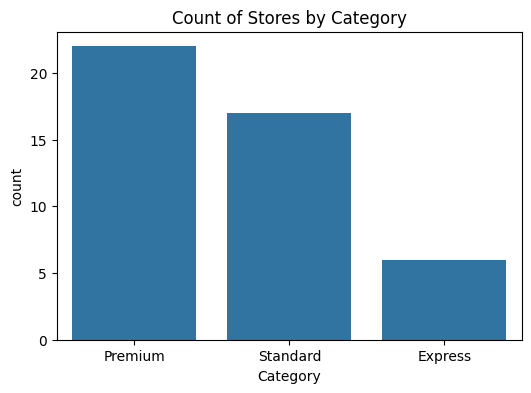

In [151]:
# Distribution of store categories
plt.figure(figsize=(6, 4))
sns.countplot(x='Category', data=stores_df)
plt.title('Count of Stores by Category')
plt.show()

The majority of stores are Premium, followed by Standard, with a smaller proportion of Express stores.

This highlights that the company's focus is likely on providing a wide product range and customer experience through large-format Premium stores, while the compact and efficient Express stores are fewer, possibly targeting niche markets or localized demand.

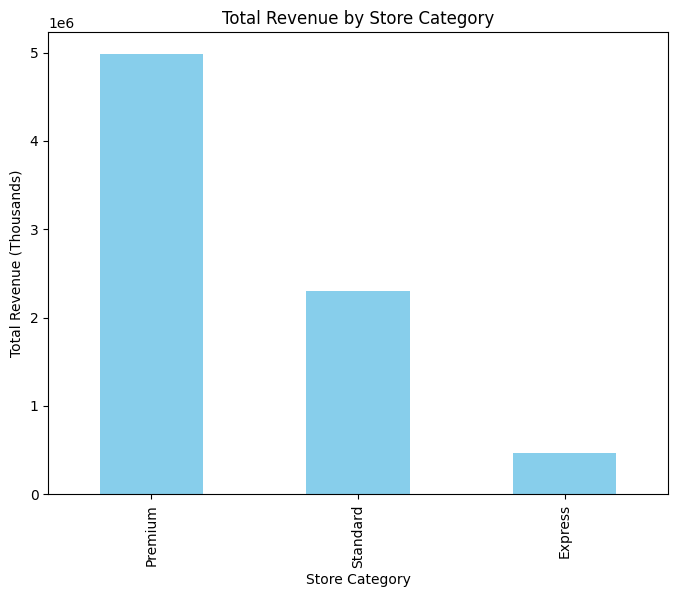

In [152]:
# Store Category Performance
category_performance = final_df.groupby('Category')['Period_Revenue_K'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_performance.plot(kind='bar', color='skyblue')
plt.title('Total Revenue by Store Category')
plt.ylabel('Total Revenue (Thousands)')
plt.xlabel('Store Category')
plt.show()

Premium stores dominate revenue, contributing significantly to overall business performance.

Standard stores show potential but may benefit from optimization in operations or promotions.

Express stores are underperforming; further investigation is required into their size, location, or customer base.

Strategies can focus on leveraging Premium stores' strengths and uplifting Express stores' performance.


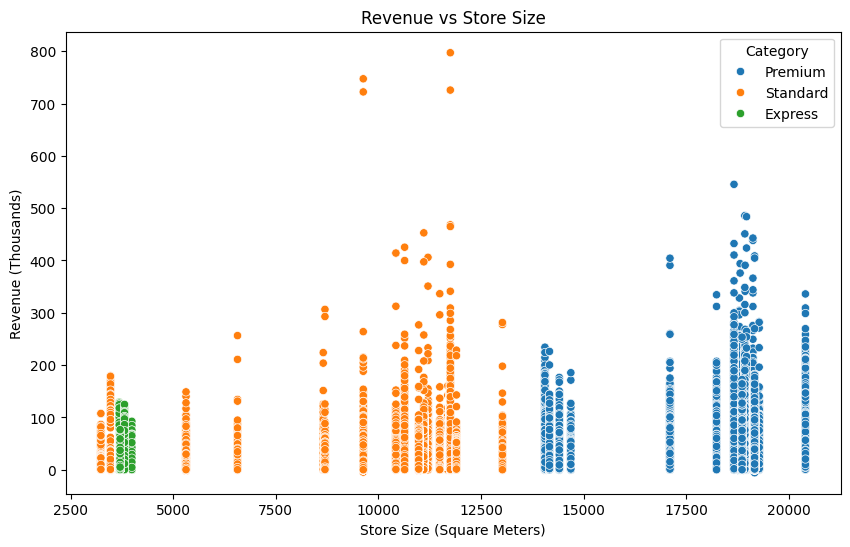

In [153]:
# Revenue vs. Store Size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='Square_Meters', y='Period_Revenue_K', hue='Category')
plt.title('Revenue vs Store Size')
plt.xlabel('Store Size (Square Meters)')
plt.ylabel('Revenue (Thousands)')
plt.show()

In [154]:
# Insights:
#Premium stores consistently outperform others in revenue due to larger sizes and potential premium product offerings.
#Standard stores exhibit significant variability, indicating that factors beyond size (e.g., promotions, location) drive revenue.
#Express stores have limited revenue potential, likely constrained by smaller sizes and category limitations.
#Outliers in revenue (e.g., small Standard stores with high revenue) should be investigated further.


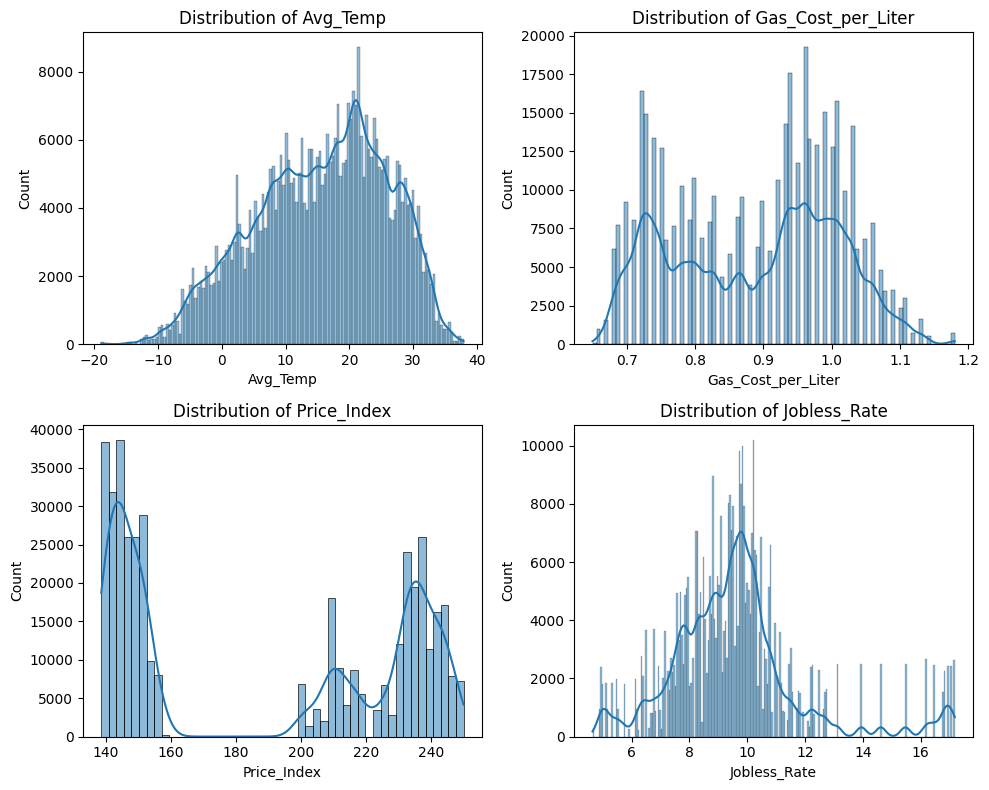

In [155]:
# Check distributions of environmental factors
env_vars = ['Avg_Temp', 'Gas_Cost_per_Liter', 'Price_Index', 'Jobless_Rate']
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
axes = axes.flatten()
for i, var in enumerate(env_vars):
    sns.histplot(final_df[var], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

1. Distribution of Average Temperature (Avg_Temp):The distribution is approximately normal, with most temperatures ranging between 10°C and 25°C.
Extreme low and high temperatures (below -10°C or above 30°C) are rare, indicating most stores operate in moderate climates.

2. Distribution of Gas Cost per Liter (Gas_Cost_per_Liter):The gas cost distribution has multiple peaks, with costs predominantly ranging between 0.8 and 1.0 per liter.
Fluctuations in gas prices might reflect external economic conditions, which could indirectly impact store logistics or consumer spending.

3. Distribution of Price Index:The distribution is bimodal, with significant peaks around 140–160 and 220–240.This indicates variations in consumer pricing across regions or time periods, potentially reflecting economic inflation or localized pricing strategies.

4. Distribution of Jobless Rate:The jobless rate is concentrated between 8% and 12%, with a slight skew toward higher unemployment rates in certain periods.
High unemployment might correlate with reduced consumer spending, impacting store revenue.


In [156]:
# Correlation between Store Size and Revenue
size_revenue_corr = final_df['Square_Meters'].corr(final_df['Period_Revenue_K'])
print(f"Correlation between Store Size and Revenue: {size_revenue_corr:.2f}")

Correlation between Store Size and Revenue: 0.24


In [157]:
# Promotions Impact Analysis
promo_cols = ['Promo1_Percent', 'Promo2_Percent', 'Promo3_Percent', 'Promo4_Percent', 'Promo5_Percent']
promo_impact = final_df[promo_cols + ['Period_Revenue_K']].corr()['Period_Revenue_K'].drop('Period_Revenue_K')

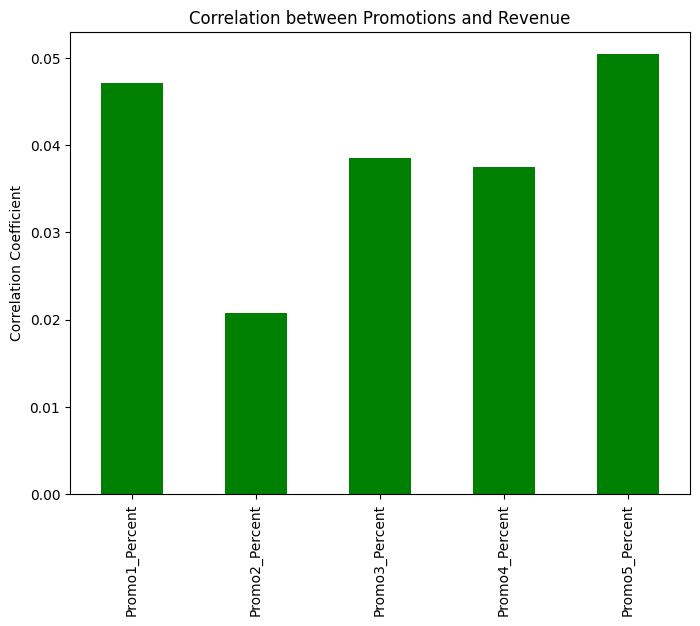

In [158]:
plt.figure(figsize=(8, 6))
promo_impact.plot(kind='bar', color='green')
plt.title('Correlation between Promotions and Revenue')
plt.ylabel('Correlation Coefficient')
plt.show()

This chart illustrates the correlation between promotional discounts  and store revenue.

**Strongest Correlation:**
Promo1_Percent and Promo5_Percent show the highest positive correlation with revenue, indicating that these promotions are the most effective in driving sales.

**Moderate Correlation:**
Promo3_Percent and Promo4_Percent also positively impact revenue but to a lesser extent compared to Promo1 and Promo5.
Weakest Correlation:

Promo2_Percent has the **lowest correlation** with revenue, suggesting it is less effective in increasing sales.


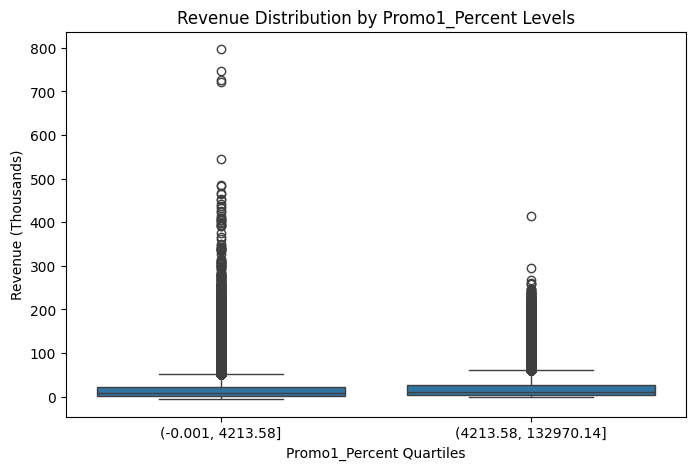

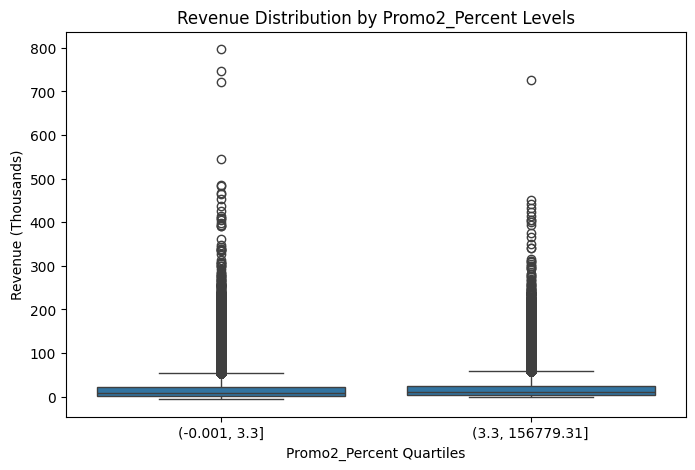

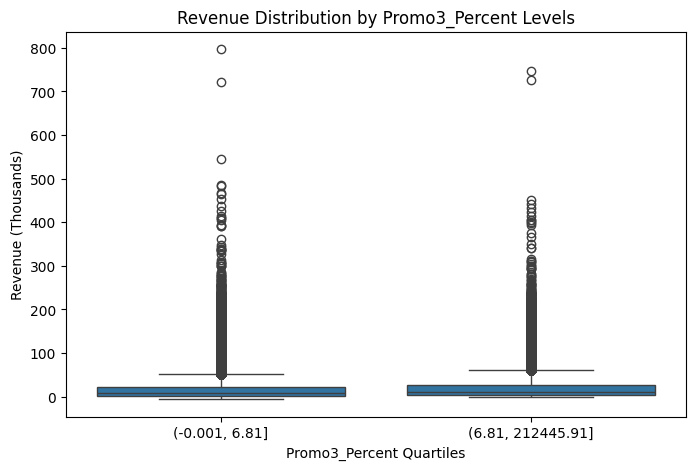

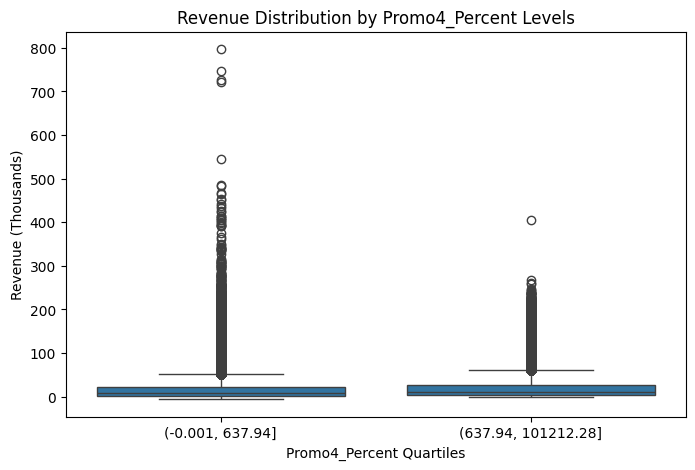

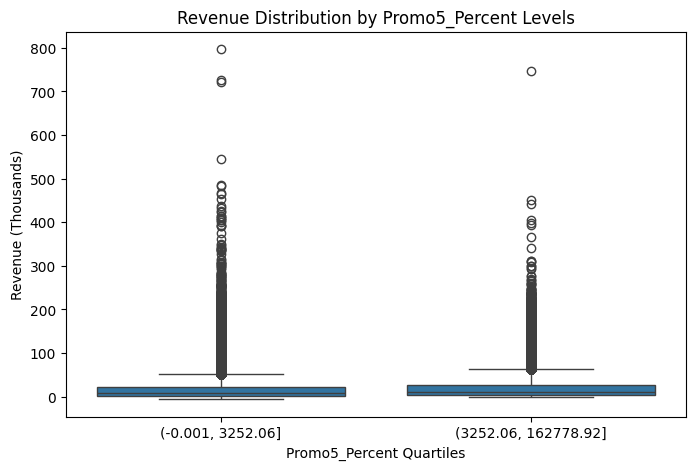

In [159]:
#Impact of Promotions on Revenue
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Boxplots to show Revenue during Different Promotion Levels
for promo in promo_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=pd.qcut(final_df[promo], 4, duplicates='drop'), y='Period_Revenue_K', data=final_df)
    plt.title(f'Revenue Distribution by {promo} Levels')
    plt.xlabel(f'{promo} Quartiles')
    plt.ylabel('Revenue (Thousands)')
    plt.show()


**Insights for Stakeholders:**

**Maximize Promo1 and Promo5**: These promotions are most impactful in driving revenue and should be prioritized in marketing strategies.

**Evaluate Promo2**: Reassess the structure or target audience of Promo2, as it shows the least impact on sales.

**Balanced Strategy**:  While focusing on high-performing promotions, continue leveraging Promo3 and Promo4 as secondary drivers of revenue.

In [160]:
#Compare Revenue Across Store Categories
# Groupby Store Category and calculate total and average revenue
category_summary = final_df.groupby('Category')['Period_Revenue_K'].agg(['sum', 'mean']).sort_values(by='sum', ascending=False)
print("Revenue Summary by Store Category:")
print(category_summary)

Revenue Summary by Store Category:
                 sum       mean
Category                       
Premium   4980663.37  23.114487
Standard  2300801.92  14.072613
Express    466328.68  10.947454


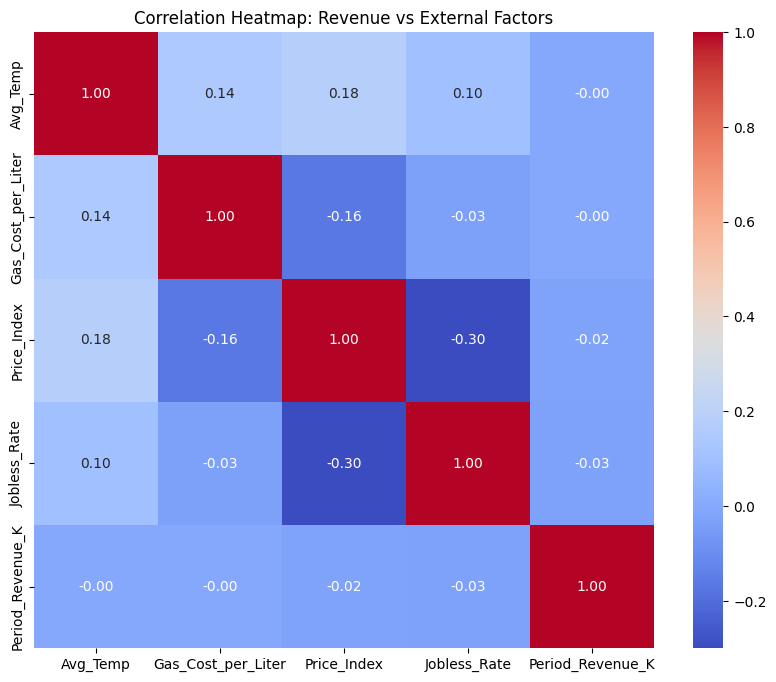

In [161]:
# Correlation Heatmap for External Features
# Step 1: Correlation Heatmap
external_factors = ['Avg_Temp', 'Gas_Cost_per_Liter', 'Price_Index', 'Jobless_Rate', 'Period_Revenue_K']
plt.figure(figsize=(10, 8))
corr_matrix = final_df[external_factors].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap: Revenue vs External Factors')
plt.show()

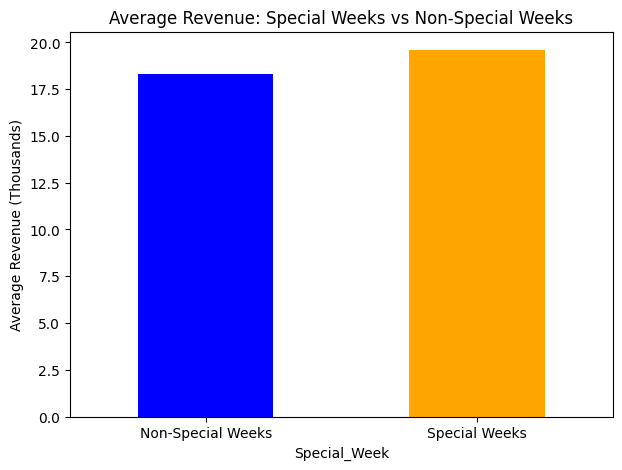

In [162]:
#Special Weeks Analysis
# Step 1: Average Revenue in Special vs Non-Special Weeks
special_week_summary = final_df.groupby('Special_Week')['Period_Revenue_K'].mean()

# Visualize Average Revenue
plt.figure(figsize=(7, 5))
special_week_summary.plot(kind='bar', color=['blue', 'orange'])
plt.title('Average Revenue: Special Weeks vs Non-Special Weeks')
plt.xticks([0, 1], ['Non-Special Weeks', 'Special Weeks'], rotation=0)
plt.ylabel('Average Revenue (Thousands)')
plt.show()


This chart compares the average revenue during Special Weeks (e.g., holidays or promotional periods) versus Non-Special Weeks.

**Key Observations:**
**Higher Revenue During Special Weeks:**

The average revenue during Special Weeks is slightly higher compared to Non-Special Weeks.This indicates that holidays or promotional events have a positive impact on sales.

**Revenue Difference:**

Although the difference between Special Weeks and Non-Special Weeks is not significant, it demonstrates that targeted efforts during Special Weeks can yield incremental revenue gains.


Insights for Stakeholders:

Leverage Special Weeks:
Capitalize on Special Weeks with strategic promotions, campaigns, and inventory planning to further boost revenue.

Non-Special Weeks:
Focus on maintaining steady performance during Non-Special Weeks by offering consistent value or smaller-scale promotions.

Improving the Impact:
Explore why the revenue uplift during Special Weeks isn’t higher and consider optimizing promotional strategies for these periods.

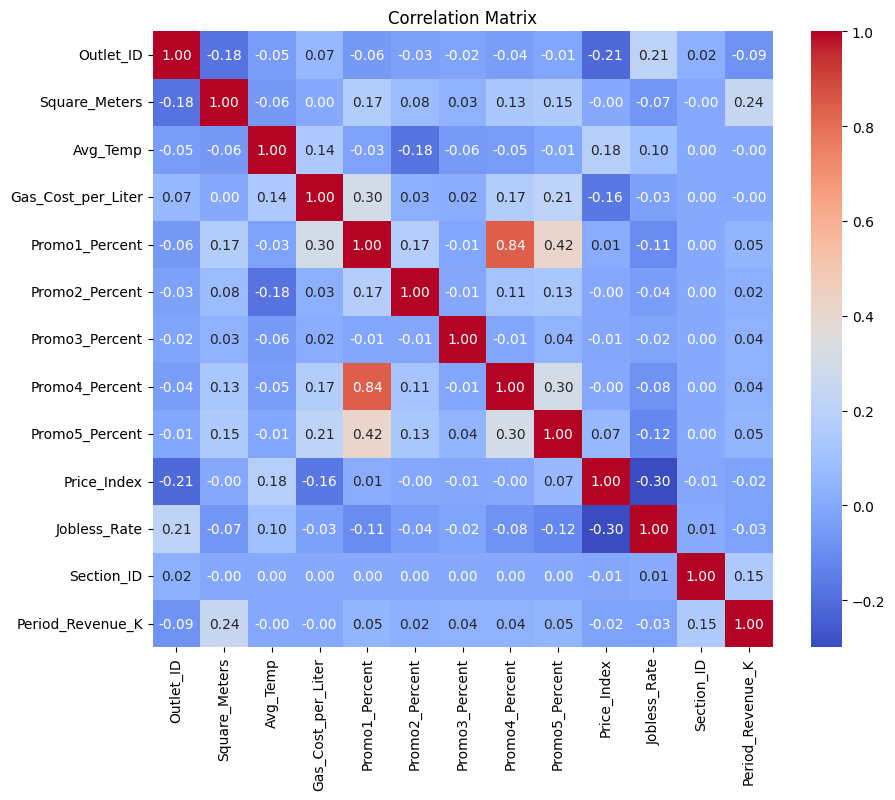

In [163]:
plt.figure(figsize=(10, 8))
numeric_df = final_df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

**STORE ANALYSIS**

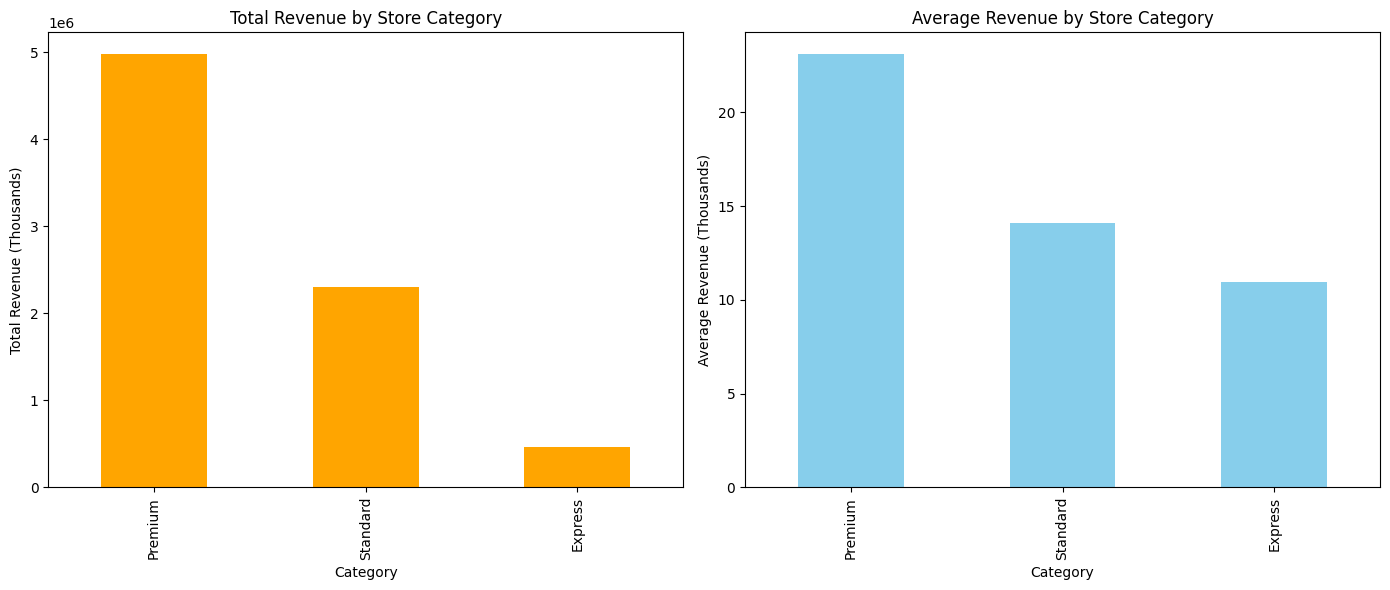

In [164]:
#Store Revenue Contribution by Category
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Total Revenue
category_summary['sum'].plot(kind='bar', ax=axes[0], color='orange')
axes[0].set_title('Total Revenue by Store Category')
axes[0].set_ylabel('Total Revenue (Thousands)')

# Average Revenue
category_summary['mean'].plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Average Revenue by Store Category')
axes[1].set_ylabel('Average Revenue (Thousands)')

plt.tight_layout()
plt.show()



In [165]:
#Store efficiency - Revenue per square meter
#Calculating revenue per square meter
final_df['Revenue_per_Square_Meter'] = final_df['Period_Revenue_K'] / final_df['Square_Meters']

In [166]:
# Average revenue per square meter by category
efficiency_by_category = final_df.groupby('Category')['Revenue_per_Square_Meter'].mean().reset_index()

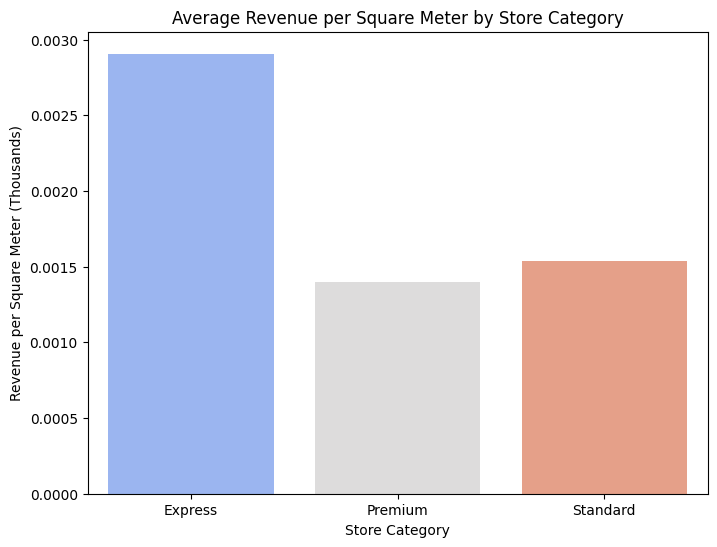

In [167]:
# Visualize revenue efficiency by category
plt.figure(figsize=(8, 6))
sns.barplot(data=efficiency_by_category, x='Category', y='Revenue_per_Square_Meter', palette='coolwarm')
plt.title('Average Revenue per Square Meter by Store Category')
plt.xlabel('Store Category')
plt.ylabel('Revenue per Square Meter (Thousands)')
plt.show()

In [168]:
#Insights
#Express stores excel in efficiency despite their lower total revenue. Expansion of their compact, efficient format could be beneficial in targeted markets.
#Premium stores can be optimized to maximize revenue per square meter, leveraging their higher customer base and product pricing.
#Standard stores require attention to identify the causes of inefficiency, such as product mix, space utilization, or customer targeting.

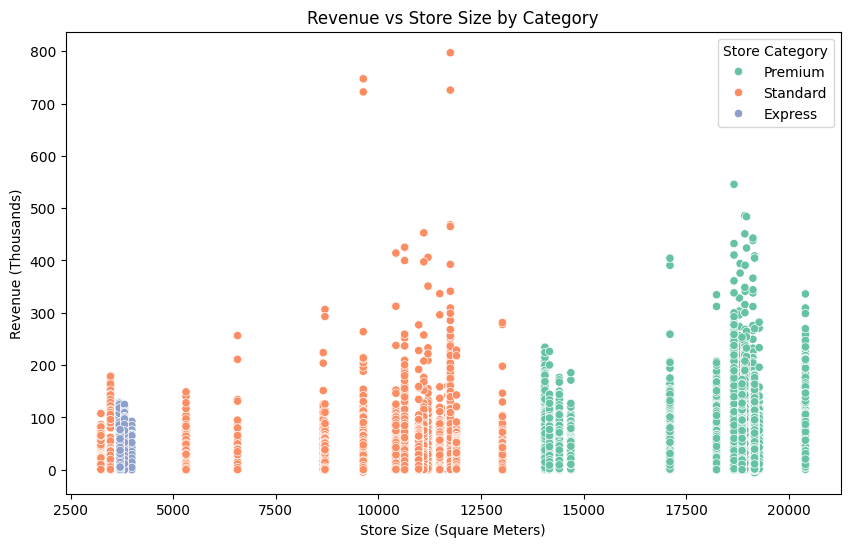

In [169]:
#Size-Revenue Relationship
#Visualize to show relationship between store size and revenue
plt.figure(figsize=(10, 6))
sns.scatterplot(data=final_df, x='Square_Meters', y='Period_Revenue_K', hue='Category', palette='Set2')
plt.title('Revenue vs Store Size by Category')
plt.xlabel('Store Size (Square Meters)')
plt.ylabel('Revenue (Thousands)')
plt.legend(title='Store Category')
plt.show()

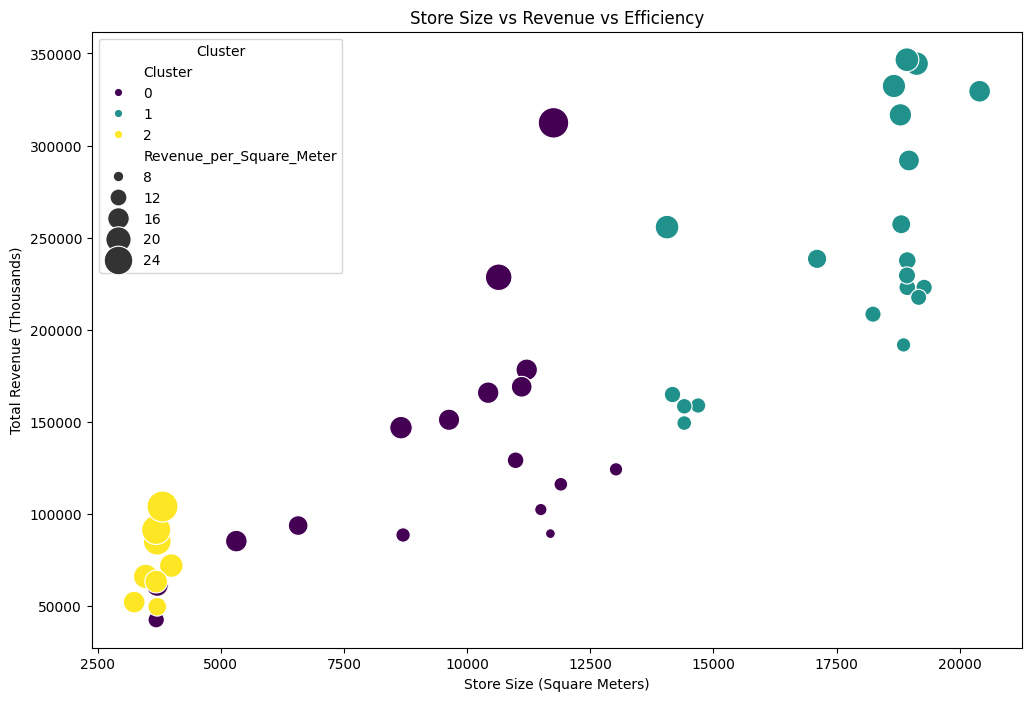

In [170]:
#Revenue vs Efficiency
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=store_clustering_data,
    x='Square_Meters', y='Period_Revenue_K',
    size='Revenue_per_Square_Meter', hue='Cluster', sizes=(50, 500), palette='viridis'
)
plt.title("Store Size vs Revenue vs Efficiency")
plt.xlabel("Store Size (Square Meters)")
plt.ylabel("Total Revenue (Thousands)")
plt.legend(title="Cluster")
plt.show()


In [171]:
# Identifying High-Performing Stores
#Ranking stores by total revenue
store_performance = final_df.groupby('Outlet_ID')['Period_Revenue_K'].sum().reset_index()
store_performance = store_performance.sort_values(by='Period_Revenue_K', ascending=False)

In [172]:
# Display top 5 performing stores
print("Top 5 Performing Stores:")
print(store_performance.head())


Top 5 Performing Stores:
    Outlet_ID  Period_Revenue_K
19       1020         346607.70
3        1004         344475.59
13       1014         332349.88
12       1013         329495.13
1        1002         316689.52


Revenue and Sales Forecasting

In [173]:
#Preparing the data for forecasting
# Aggregate revenue data by Outlet_ID and Week_Period
forecast_data = final_df.groupby(['Outlet_ID', 'Week_Period'])['Period_Revenue_K'].sum().reset_index()

# Convert Week_Period to datetime for time-series forecasting
forecast_data['Week_Period'] = pd.to_datetime(forecast_data['Week_Period'])
forecast_data = forecast_data.sort_values(by=['Outlet_ID', 'Week_Period'])


In [174]:
#Check for missing data
print("Missing values in the forecast data:")
print(forecast_data.isnull().sum())

Missing values in the forecast data:
Outlet_ID           0
Week_Period         0
Period_Revenue_K    0
dtype: int64


In [175]:
#Forecasting Future Revenue (Using ARIMA)
#importinglibraries
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

In [176]:
# Plot actual vs forecasted data
def plot_forecast(outlet_id, forecast_steps=10):  # Define a function for plotting
    # Filter data for the selected Outlet_ID
    outlet_data = forecast_data[forecast_data['Outlet_ID'] == outlet_id]
    outlet_data = outlet_data.set_index('Week_Period')

    # Train ARIMA model
    model = ARIMA(outlet_data['Period_Revenue_K'], order=(1, 1, 1))
    model_fit = model.fit()

    # Forecast future revenue
    forecast = model_fit.forecast(steps=forecast_steps)


    plt.figure(figsize=(10, 6))
    plt.plot(outlet_data.index, outlet_data['Period_Revenue_K'], label='Actual Revenue')
    plt.plot(
          pd.date_range(outlet_data.index[-1], periods=forecast_steps, freq='W'),
          forecast,
          label='Forecasted Revenue',
          color='orange'
              )
    plt.title(f"Revenue Forecast for Outlet_ID {outlet_id}")
    plt.xlabel('Week')
    plt.ylabel('Revenue (Thousands)')
    plt.legend()
    plt.show()

Revenue forecast for Outlet_ID 1001:
143    1787.945577
144    1807.089335
145    1812.309482
146    1813.732920
147    1814.121065
148    1814.226905
149    1814.255765
150    1814.263635
151    1814.265781
152    1814.266366
153    1814.266526
154    1814.266569
Name: predicted_mean, dtype: float64


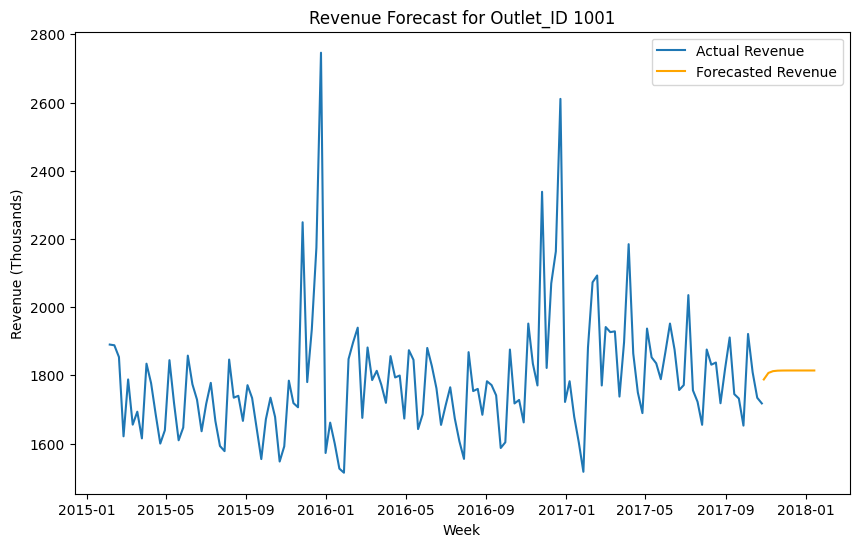

In [177]:
forecast_revenue(outlet_id=1001, forecast_steps=12)


In [178]:
correlations = final_df[['Period_Revenue_K', 'Promo1_Percent', 'Promo2_Percent', 'Special_Week']].corr()
print(correlations)


                  Period_Revenue_K  Promo1_Percent  Promo2_Percent  \
Period_Revenue_K          1.000000        0.047173        0.020718   
Promo1_Percent            0.047173        1.000000        0.174876   
Promo2_Percent            0.020718        0.174876        1.000000   
Special_Week              0.012774       -0.003521        0.207602   

                  Special_Week  
Period_Revenue_K      0.012774  
Promo1_Percent       -0.003521  
Promo2_Percent        0.207602  
Special_Week          1.000000  


In [179]:
section_performance = final_df.groupby('Section_ID')['Period_Revenue_K'].sum().sort_values(ascending=False)
print("Top Performing Sections:")
print(section_performance.head())


Top Performing Sections:
Section_ID
920    556534.97
950    516717.82
380    452085.67
720    351584.17
900    334728.68
Name: Period_Revenue_K, dtype: float64


In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

outlet_id = 1001
outlet_data = forecast_data[forecast_data['Outlet_ID'] == outlet_id]
outlet_data = outlet_data.set_index('Week_Period')
model = ARIMA(outlet_data['Period_Revenue_K'], order=(1, 1, 1))
model_fit = model.fit()

y_actual = outlet_data['Period_Revenue_K'][-10:]
y_pred = model_fit.forecast(steps=10)
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print("RMSE:", rmse)
print("MAE:", mean_absolute_error(y_actual, y_pred))

mse = mean_squared_error(y_actual, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 89.20180617613204
MAE: 78.21176658419435
RMSE: 89.20180617613204


Store Segmentation

In [181]:
# Aggregate revenue and calculate efficiency metrics
store_clustering_data = final_df.groupby('Outlet_ID').agg({
    'Square_Meters': 'mean',
    'Period_Revenue_K': 'sum'
}).reset_index()


In [182]:
# Calculate Revenue per Square Meter
store_clustering_data['Revenue_per_Square_Meter'] = (
    store_clustering_data['Period_Revenue_K'] / store_clustering_data['Square_Meters']
)

In [183]:
# Include store category (encode categorical values numerically)
category_mapping = {'Premium': 1, 'Standard': 2, 'Express': 3}
store_clustering_data = store_clustering_data.merge(stores_df[['Outlet_ID', 'Category']], on='Outlet_ID')
store_clustering_data['Category'] = store_clustering_data['Category'].map(category_mapping)

# Display data for clustering
print("Data prepared for clustering:")
print(store_clustering_data.head())

Data prepared for clustering:
   Outlet_ID  Square_Meters  Period_Revenue_K  Revenue_per_Square_Meter  \
0       1001        14058.0         255763.30                 18.193434   
1       1002        18795.0         316689.52                 16.849669   
2       1003         3474.0          66224.54                 19.062907   
3       1004        19125.0         344475.59                 18.011796   
4       1005         3240.0          52296.73                 16.140966   

   Category  
0         1  
1         1  
2         2  
3         1  
4         2  


In [184]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = ['Square_Meters', 'Period_Revenue_K', 'Revenue_per_Square_Meter', 'Category']
X = store_clustering_data[features]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Normalized data shape:", X_scaled.shape)


Normalized data shape: (45, 4)


In [185]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters using the Elbow Method
wcss = []  # Within-cluster sum of squares
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

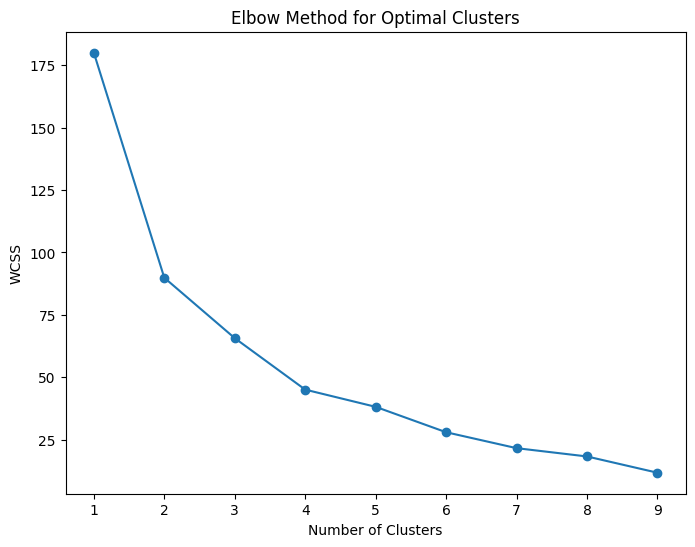

In [186]:
# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [187]:
# Perform K-Means clustering
optimal_k = 3  # Replace with the number determined from the Elbow Method
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
store_clustering_data['Cluster'] = kmeans.fit_predict(X_scaled)


In [188]:
# Display clustered data
print("Clustered data:")
print(store_clustering_data.head())

Clustered data:
   Outlet_ID  Square_Meters  Period_Revenue_K  Revenue_per_Square_Meter  \
0       1001        14058.0         255763.30                 18.193434   
1       1002        18795.0         316689.52                 16.849669   
2       1003         3474.0          66224.54                 19.062907   
3       1004        19125.0         344475.59                 18.011796   
4       1005         3240.0          52296.73                 16.140966   

   Category  Cluster  
0         1        1  
1         1        1  
2         2        2  
3         1        1  
4         2        2  


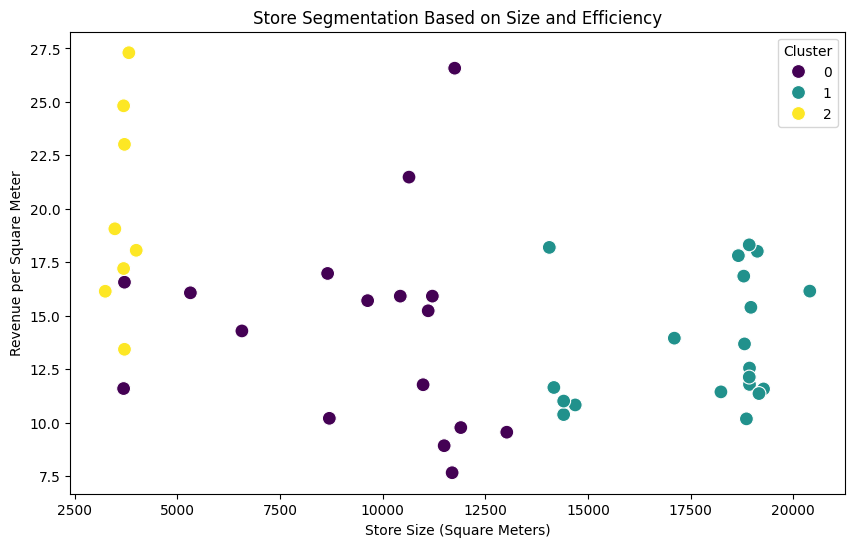

In [189]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=store_clustering_data,
    x='Square_Meters',
    y='Revenue_per_Square_Meter',
    hue='Cluster',
    palette='viridis',
    s=100
)
plt.title('Store Segmentation Based on Size and Efficiency')
plt.xlabel('Store Size (Square Meters)')
plt.ylabel('Revenue per Square Meter')
plt.legend(title='Cluster')
plt.show()

In [190]:
from sklearn.metrics import silhouette_score
score = silhouette_score(X_scaled, kmeans.labels_)
print("Silhouette Score:", score)


Silhouette Score: 0.41123067922825035


In [191]:
cluster_summary = store_clustering_data.groupby('Cluster').agg({
    'Square_Meters': 'mean',
    'Period_Revenue_K': 'mean',
    'Revenue_per_Square_Meter': 'mean'
}).reset_index()
print(cluster_summary)


   Cluster  Square_Meters  Period_Revenue_K  Revenue_per_Square_Meter
0        0    9440.882353     134496.341176                 14.361715
1        1   17743.700000     243825.311000                 13.658621
2        2    3664.125000      73106.243750                 19.878012


***Key Characteristics Considered: ***

1. **Store Size (Square Meters)**: differentiates between small, medium, and large stores.
2. **Revenue Performance** : Total Revenue Generated by each store
3. **Revenue per square meter** : Measures operational efficiency as it highlights how well each store utilizes it available space
4. **Store Category** : Identified the types of stores (Premium,Standard,Express) based on their operational strategies.


**Clustering Outcome:**

Clusters revealed distinct performance tiers:

**High-revenue but low-efficiency** Premium stores.

**Highly efficient** small-format Express stores.

**Standard stores** with moderate revenue and efficiency.


***Tailored Strategies for each cluster:***

**Cluster 0 (Medium stores):**
Target operational improvements to enhance efficiency.
Leverage insights from highly efficient Express stores (Cluster 2).

**Cluster 1 (Large stores):**
Focus on improving space utilization and boosting revenue per square meter.
Use targeted promotions and inventory management to maximize performance.

**Cluster 2 (Small stores):**
Expand the successful Express store model to other suitable locations.
Continue focusing on maintaining high efficiency.